In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)


**************************************************************************************
Breast Cancer Wisconsin (Diagnostic) Dataset Classification with Logistic Regression.
**************************************************************************************
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.159

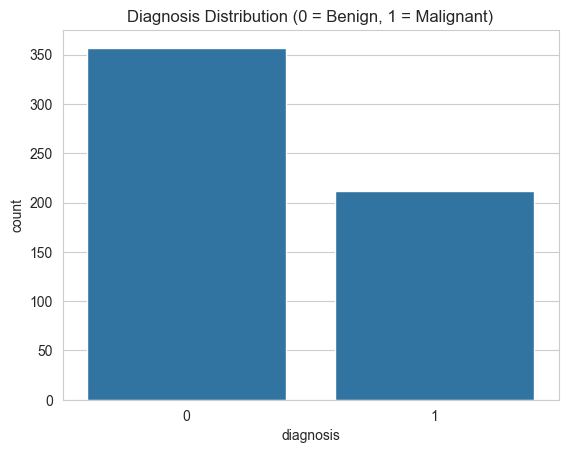

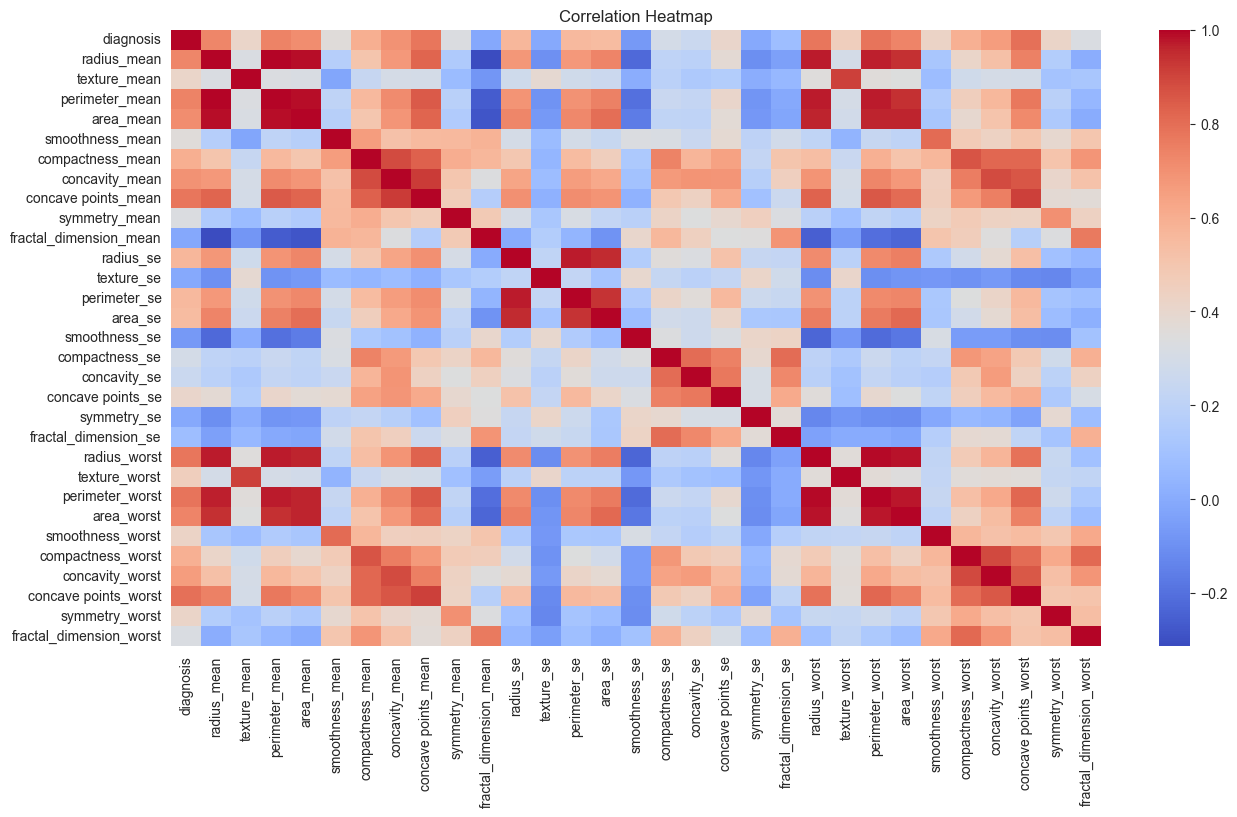

Cleaned dataset saved as breast_cancer_cleaned.csv


In [15]:
print("**************************************************************************************")
print("Breast Cancer Wisconsin (Diagnostic) Dataset Classification with Logistic Regression.")
print("**************************************************************************************")
df = pd.read_csv("breast cancer.csv")
print(df.head())
print(df.info())
print(df.describe())
print(df.head())
print('--------------------------------------------------------------------------------------------------')
print(df.tail())
df = df.drop(columns=["id", "Unnamed: 32"], errors="ignore")
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("DATA PREPROCESSED SUCCESSFULLY")
print("▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️EXPLORATORY DATA ANALYSIS▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️")
print("Dataset Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=y)
plt.title("Diagnosis Distribution (0 = Benign, 1 = Malignant)")
plt.show()
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns
df.to_csv("breast_cancer_cleaned.csv", index=False)
print("Cleaned dataset saved as breast_cancer_cleaned.csv")



LOGISTIC REGRESSION MODEL BUILDING
Model trained successfully!

===== MODEL PERFORMANCE =====
Accuracy : 0.9736842105263158
Precision: 0.975609756097561
Recall   : 0.9523809523809523
F1 Score : 0.963855421686747
ROC-AUC  : 0.996031746031746

Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        72
   Malignant       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



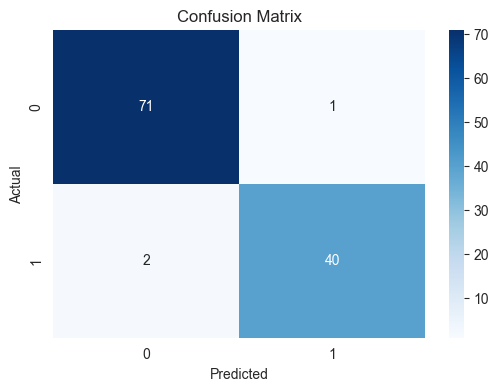

Receiver Operating Characteristic
X-axis → False Positive Rate (FPR)
Y-axis → True Positive Rate (TPR / Recall)



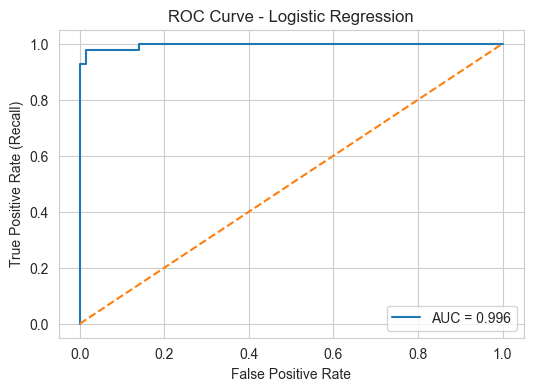

In [16]:
print("====================================")
print("LOGISTIC REGRESSION MODEL BUILDING")
print("====================================")

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt
# ----------------------------------------
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X_train_scaled, y_train)
print("Model trained successfully!\n")

y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]
print("===== MODEL PERFORMANCE =====")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
print("Receiver Operating Characteristic")
print("X-axis → False Positive Rate (FPR)")
print("Y-axis → True Positive Rate (TPR / Recall)")
print()
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend()
plt.show()

